# Implementação
 Resolver a integral:
\begin{equation}
\int_\Omega \phi_i(x) \phi_i(x) \partial x =
 \int_{-1}^{1} \phi_i(\epsilon) \phi_i(\epsilon) J\partial \epsilon \\
 = \sum^Q_{q=1} \phi_i(\epsilon_q) \phi_i(\epsilon_q) w_q J_q
\end{equation}

In [25]:
using Jacobi
using PyPlot

In [26]:
using LaTeXStrings

In [27]:
#intervalo
x = linspace(-1,1,101)
function ϕ0(x)
    if(x<=1.0 && x >= -1.0)
        ϕ0 = (1-x)/2
    else
        ϕ0 = 0
    end
    return ϕ0
end
function ϕ1(x)
    if(x<=1.0 && x >= -1.0)
        ϕ1 = (1+x)/2
    else
        ϕ1 = 0
    end
    return ϕ1
end

function ψ(p,E)
    if(p == 1)
     return  (1-E)/2
    end 
    if(p == 2)
     return  (1+E)/2
    end
     return  (1-E)*(1+E)/4 * jacobi(E, p-3, 1, 1)
end    
   

ψ (generic function with 1 method)

In [28]:
x = linspace(-1,1,101)
p1 = [ψ(1,E) for E in x ]
p2 = [ψ(2,E) for E in x ]
p3 = [ψ(3,E) for E in x ]
p4 = [ψ(5,E) for E in x ]


101-element Array{Any,1}:
 0.0      
 0.0282299
 0.0530376
 0.0745979
 0.0930816
 0.108656 
 0.121486 
 0.13173  
 0.139546 
 0.145086 
 0.1485   
 0.149934 
 0.14953  
 ⋮        
 0.149934 
 0.1485   
 0.145086 
 0.139546 
 0.13173  
 0.121486 
 0.108656 
 0.0930816
 0.0745979
 0.0530376
 0.0282299
 0.0      

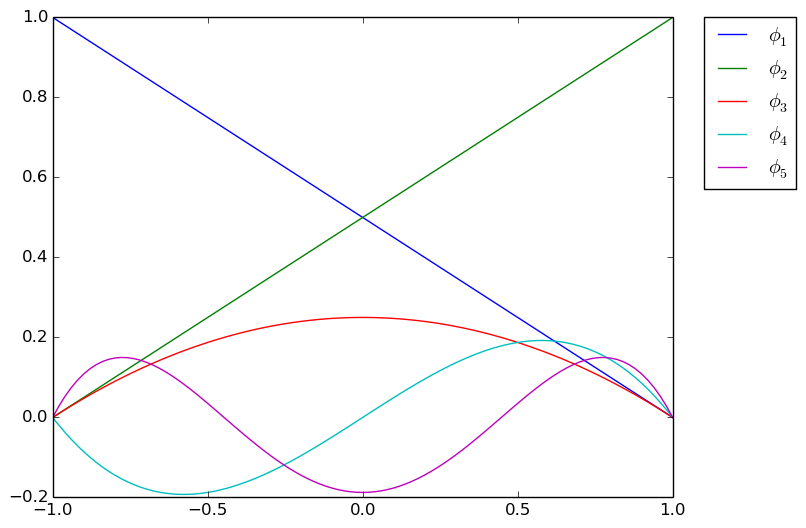

In [29]:
for i in 1:5
    plot(x,[ψ(i,E) for E in x ], label = LaTeXString("\$ \\phi_{$i} \$"))
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
end

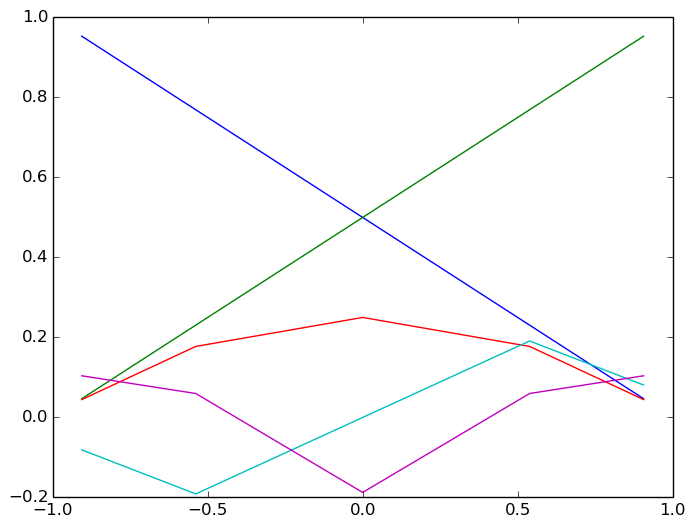

In [30]:
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
Q = 5
I = 2*Q - 1
ϕ = zeros(I,Q)
ξ = zgj(Q)
w = wgj(ξ,0.,0.)
for i in 1:I
    for j in 1:Q
        ϕ[i,j] = ψ(i,ξ[j])
    end
end
for i in 1:Q
    plot(ξ,ϕ[i,:]')
end


In [31]:
M = zeros(I,I)
for i in 1:I
    for j in i:I
       m= 0.0
        for q in 1:Q
            m = m + ϕ[i,q]*ϕ[j,q]*w[q]
        end
        M[i,j] = m
        M[j,i] = m
    end
end
M


9x9 Array{Float64,2}:
  0.666667      0.333333      0.166667     …  -1.0842e-18  -3.05745e-17
  0.333333      0.666667      0.166667         0.0         -3.1225e-17 
  0.166667      0.166667      0.0666667       -2.1684e-19  -0.00859788 
 -0.0666667     0.0666667     5.42101e-19     -0.00907029   1.0842e-19 
  3.81639e-17   3.81639e-17  -0.0142857        0.0          0.0202271  
 -3.27429e-17   3.1225e-17   -4.33681e-19  …   0.0100781    0.0        
  2.88398e-17   3.1225e-17    9.97466e-18     -2.1684e-19  -0.0178357  
 -1.0842e-18    0.0          -2.1684e-19       0.00719865   0.0        
 -3.05745e-17  -3.1225e-17   -0.00859788       0.0          0.0148986  

# Verificando M

\begin{align}
  u &= f \\
 \int_\Omega u \partial x &= \int_\Omega f \partial x \\
 \int_\Omega v\ u\ \partial x &= \int_\Omega v\ f\ \partial x \\
 \sum_{q=1}^Q \hat{u_i} \int_\Omega \phi_i(x) \phi_k(x) \partial x &= \sum^Q_{q=1} f(\xi_q)\ \phi_k(\xi_q)\ w_q \\
 M\ \hat{u} &= F_r 
\end{align}

\begin{align}
 u(x) &= \sum^{Q}_{q=1} \hat{u_i} \phi_i(x) \\
 u    &= \phi \hat{u}
\end{align}

In [32]:
#resolve A*X = B
function solver_beta(A,B,nb)
  Abb = A[1:nb,1:nb]
  Abi = A[1:nb,(nb+1):end]
  Aii = A[(nb+1):end,(nb+1):end]
  Aib = A[(nb+1):end,1:nb]
  #########################
  #                       #
  #  |Abb Abi| |xb| = |Bb|#
  #  |Aib Aii| |xi|   |Bi|#
  #########################

  Bi = B[(nb+1):end]
  Bb = B[1:nb]

  Xb = inv(Abb - Abi*inv(Aii)*Aib)* (Bb - Abi*inv(Aii)*Bi)
  Xi = inv(Aii)*Bi - inv(Aii)*transpose(Abi)*Xb

  X = [Xb;Xi]
end


solver_beta (generic function with 1 method)

In [39]:
fun(x) = sin(pi*x)

#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
Q = 20
I = 15
ϕ = zeros(Q,I)
ξ = zgj(Q)
w = wgj(ξ,0.,0.)
for i in 1:I
    for j in 1:Q
        ϕ[j,i] = ψ(i,ξ[j])
    end
end

ϕ


20x15 Array{Float64,2}:
 0.996564   0.0034357  0.0034239  …   0.0298384   -0.0311133   0.0320688
 0.981986   0.018014   0.0176895      0.0388818   -0.0250285   0.0105693
 0.956117   0.0438828  0.0419571     -0.0610955    0.069024   -0.0650778
 0.919558   0.0804415  0.0739707     -0.0328608   -0.0133076   0.0521157
 0.873166   0.126834   0.110747       0.0897945   -0.077938    0.0291461
 0.818027   0.181973   0.148859   …   0.00466477   0.0705601  -0.091153 
 0.755434   0.244566   0.184754      -0.103661     0.039341    0.0573765
 0.686853   0.313147   0.215086       0.0342795   -0.104348    0.0436064
 0.613893   0.386107   0.237028       0.0973358    0.0291948  -0.103248 
 0.538263   0.461737   0.248536      -0.0718984    0.0884881   0.0536628
 0.461737   0.538263   0.248536   …  -0.0718984   -0.0884881   0.0536628
 0.386107   0.613893   0.237028       0.0973358   -0.0291948  -0.103248 
 0.313147   0.686853   0.215086       0.0342795    0.104348    0.0436064
 0.244566   0.755434   0.18

In [40]:
M = zeros(I,I)
for i in 1:I
    for j in i:I
       m= 0.0
        for q in 1:Q
            m = m + ϕ[q,i]*ϕ[q,j]*w[q]
        end
        M[i,j] = m
        M[j,i] = m
    end
end
M

15x15 Array{Float64,2}:
  0.666667      0.333333      0.166667     …  -1.50579e-17  -4.24702e-18
  0.333333      0.666667      0.166667         1.45283e-17  -3.79471e-18
  0.166667      0.166667      0.0666667        2.34628e-19  -6.93381e-18
 -0.0666667     0.0666667    -2.14368e-18      2.44581e-18   6.77626e-21
 -3.0911e-17   -3.40168e-17  -0.0142857        1.01644e-19   9.89589e-18
  3.50894e-18  -4.90601e-18  -4.01282e-20  …   5.54044e-18  -6.01393e-20
  1.36707e-17   1.31188e-17   5.00194e-18     -5.75982e-20  -1.23667e-19
 -1.66251e-18   5.25838e-18  -4.59092e-19     -3.2255e-18    7.11508e-20
 -1.19097e-17  -1.23057e-17  -5.35113e-19     -7.28448e-20  -2.71389e-18
  1.48025e-17  -1.27394e-17  -4.89162e-19     -8.28398e-19   8.30092e-20
 -1.85629e-17  -1.69136e-17  -8.50866e-18  …   1.40607e-19   2.59192e-19
 -1.0218e-17    9.97466e-18   3.46225e-19     -0.00496894   -1.4569e-19 
  3.51366e-17   3.48029e-17   9.34044e-18      4.74338e-20  -0.00460548 
 -1.50579e-17   1.45283e-17

In [41]:
fr = zeros(I)
for i in 1:I
    temp = 0.0
    for q in 1:Q
        temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
    end
    fr[i]= temp
end
fr

15-element Array{Float64,1}:
 -0.31831    
  0.31831    
  8.95271e-18
  0.193509   
 -9.02937e-19
 -0.0823994  
  2.7393e-18 
  0.00971303 
  2.38863e-18
 -0.000539007
  6.74238e-19
  1.7461e-5  
 -4.96361e-19
 -3.71532e-7 
 -2.25311e-19

In [42]:
uh = solver_beta(M,fr,0)

15-element Array{Float64,1}:
 -3.94515e-9 
  3.94514e-9 
  8.92768e-14
  4.77465    
  7.97479e-14
 -0.914905   
  5.4466e-14 
  0.0692349  
  4.30172e-14
 -0.00282615 
  5.36564e-14
  7.23635e-5 
  3.19324e-14
 -1.28966e-6 
  1.88062e-14

In [43]:
uq = ϕ*uh

20-element Array{Float64,1}:
 -0.0215855
 -0.112944 
 -0.272243 
 -0.484183 
 -0.715208 
 -0.910036 
 -0.999417 
 -0.922316 
 -0.656078 
 -0.238106 
  0.238106 
  0.656078 
  0.922316 
  0.999417 
  0.910036 
  0.715208 
  0.484183 
  0.272243 
  0.112944 
  0.0215855

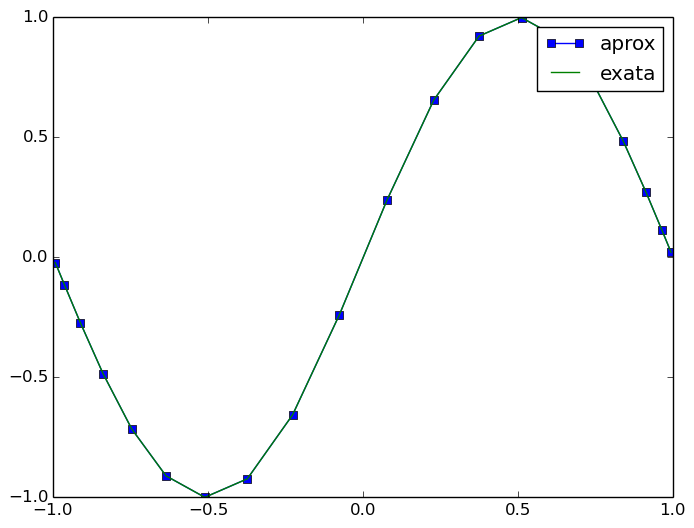

1.5128483188409092e-9

In [44]:
ue = [fun(i) for i in ξ] 
erro = uq - ue
plot(ξ,uq,"-s",label= "aprox")
plot(ξ,ue,label="exata")
legend()

maximum(erro)